## Figure 4: School level mean percent of board members from finance over time

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_school_level_elite_embed, clear
drop pehedgeb* pehedge_*

# Brown unitid 217156 missing data before 2008, Brandeis unitid 165015 before 2004 if unitid==217156

In [2]:
qui {
    foreach var in pehedge otherfinance nonfinbiz {
    gen `var'public=`var' * 100 if schooltypenum==2
    gen `var'private=`var' * 100 if schooltypenum==3
    }
collapse (mean) pehedge* otherfinance* nonfinbiz*, by(year)
}

In [3]:
label var pehedgepublic "Top 30 public" 
label var otherfinancepublic "Top 30 public" 
label var pehedgeprivate "Top 30 private" 
label var otherfinanceprivate "Top 30 private"

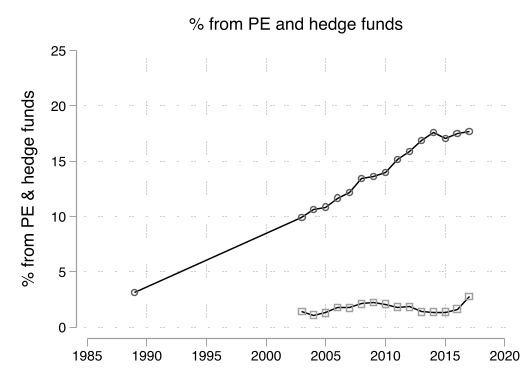

In [4]:
set scheme plotplain
tw (connect pehedgeprivate pehedgepublic year), ///
xlabel(1985(5)2020) scale(1.4) xtitle("") ///
ytitle("% from PE & hedge funds") legend(size(medium) order(1 3 2)) ///
ylabel(0(5)25) legend(off) name(pehedge, replace) ///
title(% from PE and hedge funds)

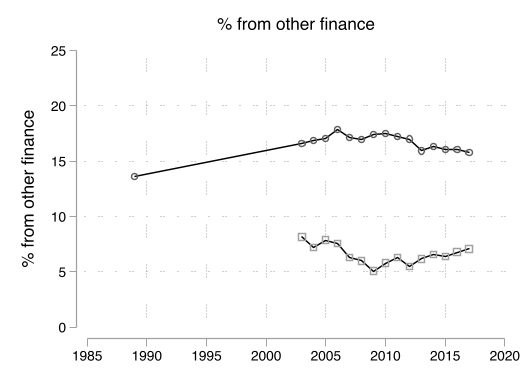

In [5]:
tw (connect otherfinanceprivate otherfinancepublic year), ///
xlabel(1985(5)2020,) ylabel(0(5)25) xtitle("") scale(1.4) ///
ytitle("% from other finance") ///
title("% from other finance") legend(off) name(finall, replace)

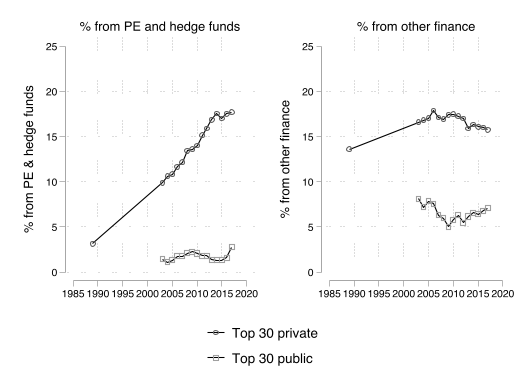

In [6]:
grc1leg pehedge finall, row(1)

In [7]:
graph export figures/f4_finance_board_time.pdf, replace

file figures/f4_finance_board_time.pdf saved as PDF format
